# Wallmart : Analytics and Forecast

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


from sklearn.model_selection import train_test_split

#Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import median_absolute_error


In [2]:
filename = 'Walmart Data Analysis and Forcasting.csv'

In [3]:
df = pd.read_csv(filename)
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


We should change 'Date' columns type to Datetime then we could separate day-month-year

In [5]:
# Normalize if necessery

# normalized_sales = (df.Weekly_Sales-df.Weekly_Sales.min())/(df.Weekly_Sales.max()-df.Weekly_Sales.min())
# normalized_fuel = (df.Fuel_Price-df.Fuel_Price.min())/(df.Fuel_Price.max()-df.Fuel_Price.min())
# normalized_CPI = (df.CPI-df.CPI.min())/(df.CPI.max()-df.CPI.min())
# normalized_Temperature = (df.Temperature-df.Temperature.min())/(df.Temperature.max()-df.Temperature.min())
# normalized_Unemployment = (df.Unemployment-df.Unemployment.min())/(df.Unemployment.max()-df.Unemployment.min())

datetimes = pd.to_datetime(df.Date)

In [11]:
df2 = df.copy()

# df2.Weekly_Sales = normalized_sales
# df2.Fuel_Price = normalized_fuel
# df2.CPI = normalized_CPI
# df2.Temperature = normalized_Temperature
# df2.Unemployment = normalized_Unemployment

df2.Date = datetimes

df2['Day'] = df2.Date.dt.day
df2['Month'] = df2.Date.dt.month
df2['Year'] = df2.Date.dt.year

df2.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  Month  Year  
0  211.096358         8.106    2      5  2010  
1  211.242170         8.106    2     12  2010  
2  211.289143         8.106   19      2  2010  
3  211.319643         8.106   26      2  2010  
4  211.350143         8.106    3      5  2010

Looks like it isnt sorted yet

In [12]:
# Sort according dates

df2 = df2.sort_values(by=['Date'],ascending=True)
df2.reset_index()
df2.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
606       5 2010-01-10     283178.12             0        71.10       2.603   
2036     15 2010-01-10     566945.95             0        59.69       2.840   
5897     42 2010-01-10     481523.93             0        86.01       3.001   
4610     33 2010-01-10     224294.39             0        91.45       3.001   
5039     36 2010-01-10     422169.47             0        74.66       2.567   

             CPI  Unemployment  Day  Month  Year  
606   212.226946         6.768   10      1  2010  
2036  132.756800         8.067   10      1  2010  
5897  126.234600         9.003   10      1  2010  
4610  126.234600         9.265   10      1  2010  
5039  210.440443         8.476   10      1  2010

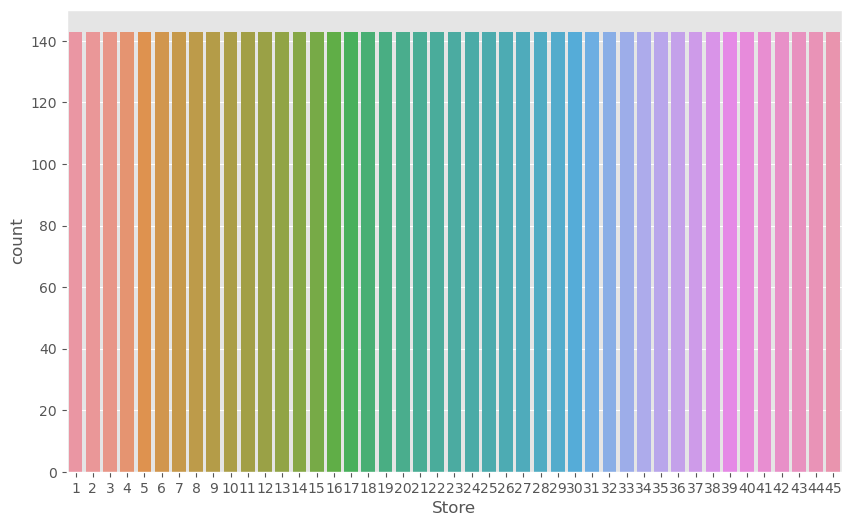

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2,x=df2.Store)
plt.show()

# df2.Store.value_counts().plot.bar()
# plt.show()

That means every store has 140 Weekly Sales Recorded

In [28]:
ts = df2.copy()
ts.set_index('Date',inplace=True)

ts.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64

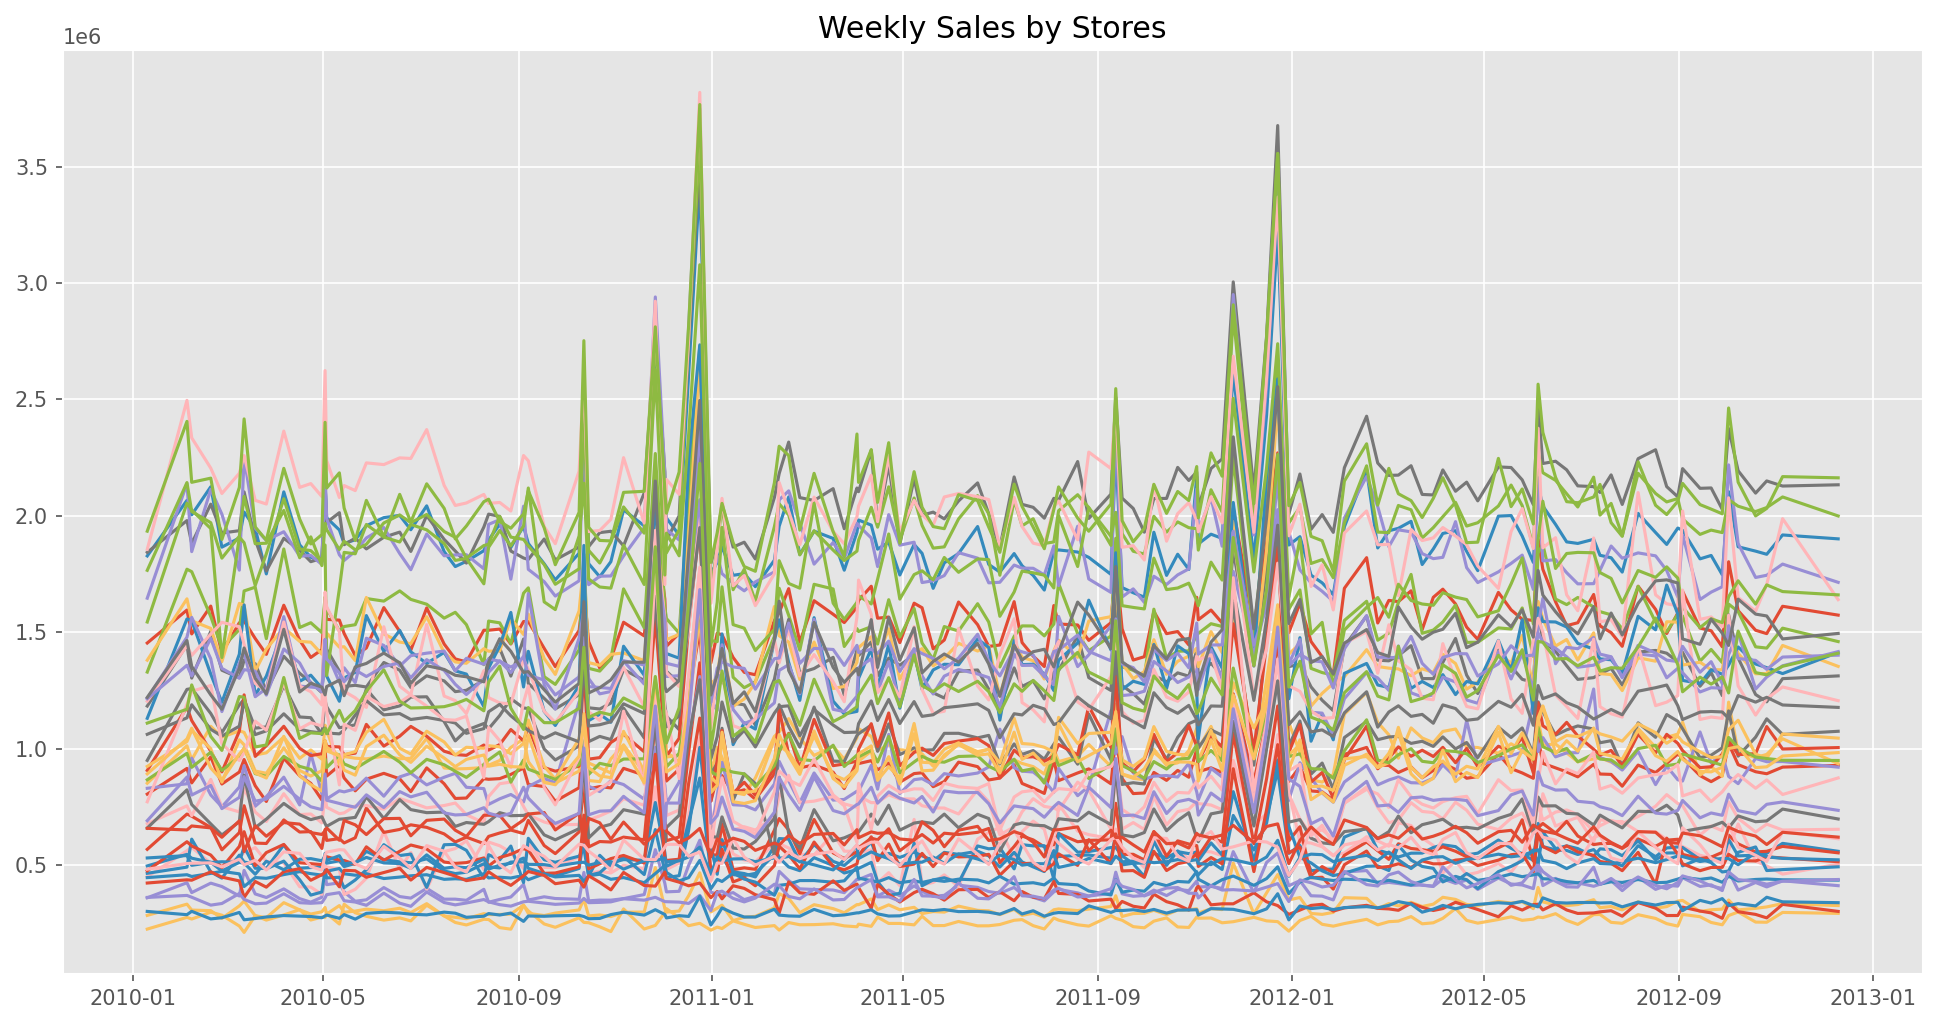

In [18]:
plt.figure(figsize=(16, 8), dpi=150)
for i in range(1,46):
    plt.plot(ts[ts.Store == i].Weekly_Sales,label=f"Store {i}")
    # ts[ts.Store == i].Weekly_Sales.plot(label=f"Store {i}")
    
plt.title('Weekly Sales by Stores')
plt.show()

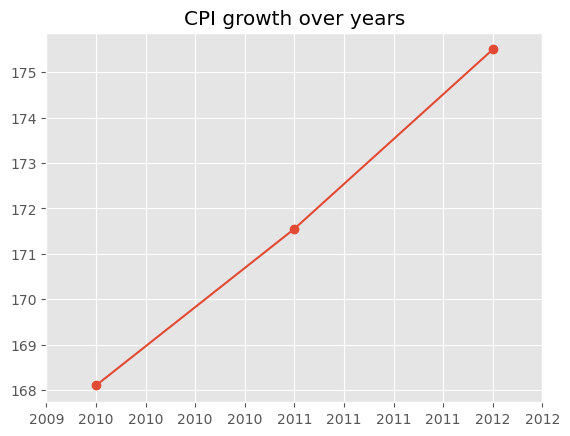

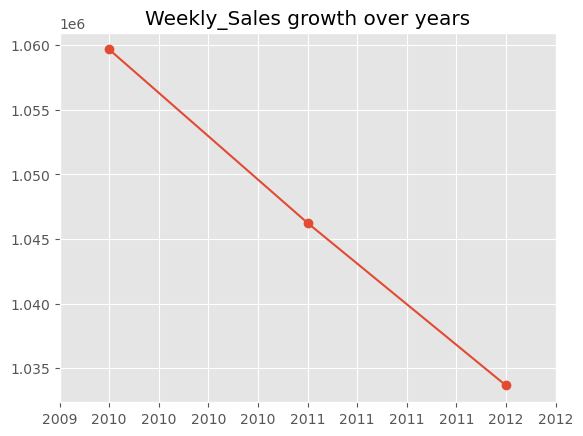

In [46]:
# Let's Look at CPI and Sales growth

data = df2.groupby('Year')['CPI','Weekly_Sales'].mean().round(2)

for cols in data.columns:
    plt.plot(data[cols],marker='o')
    plt.title(f"{cols} growth over years")
    plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
    plt.show()

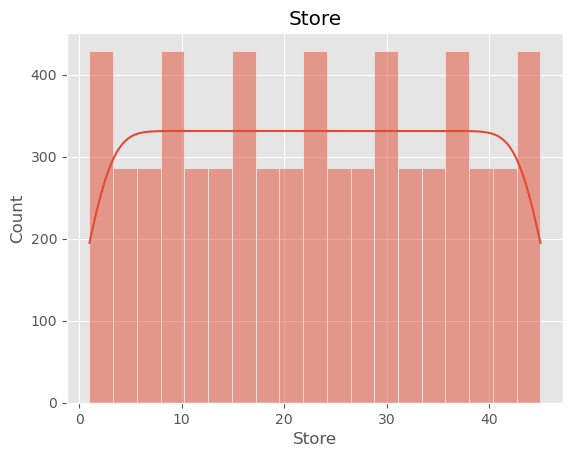

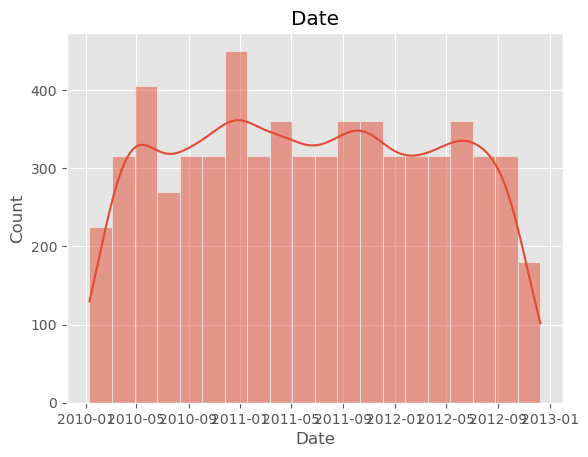

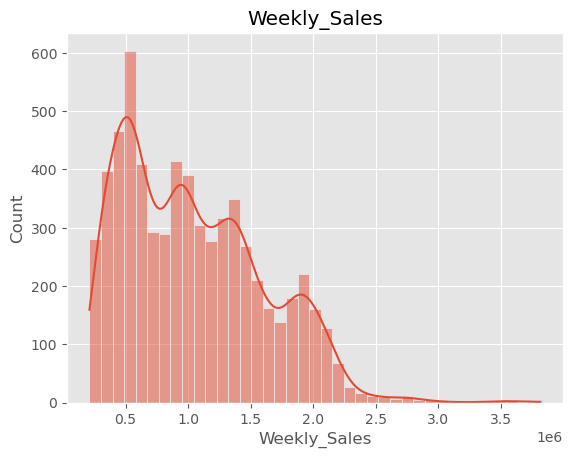

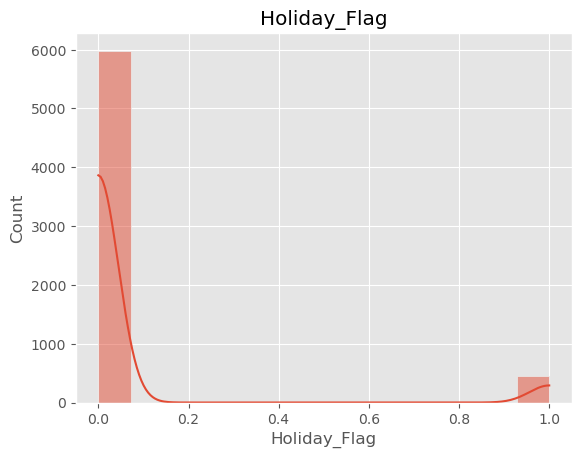

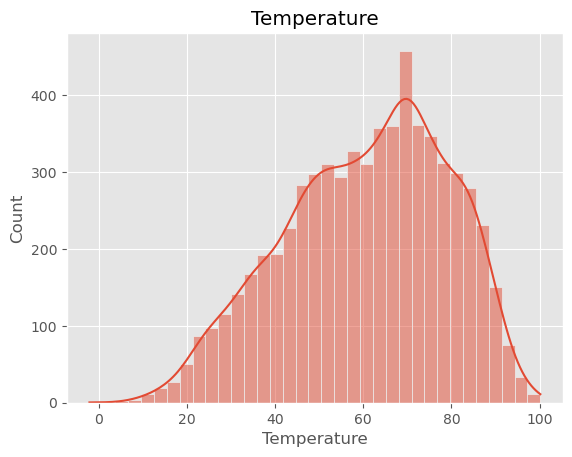

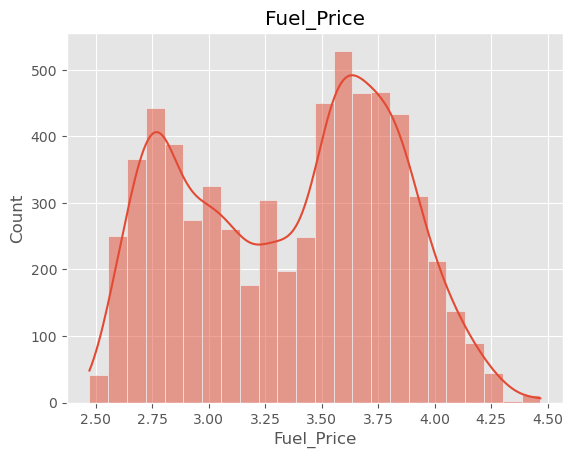

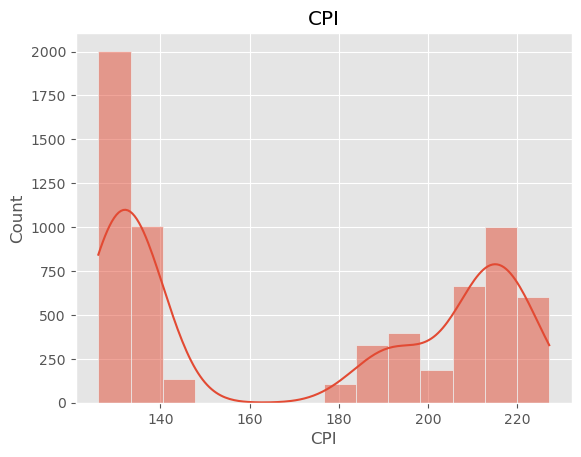

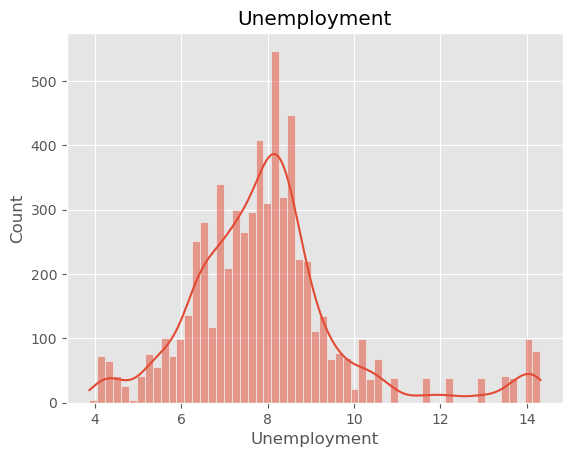

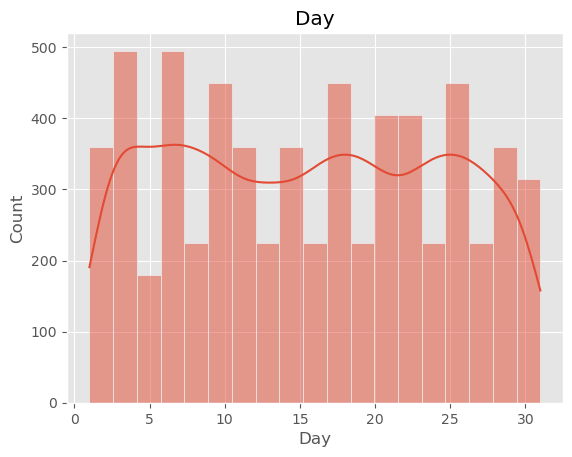

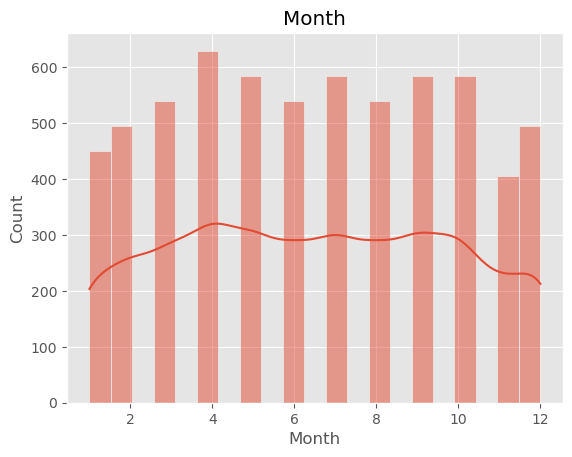

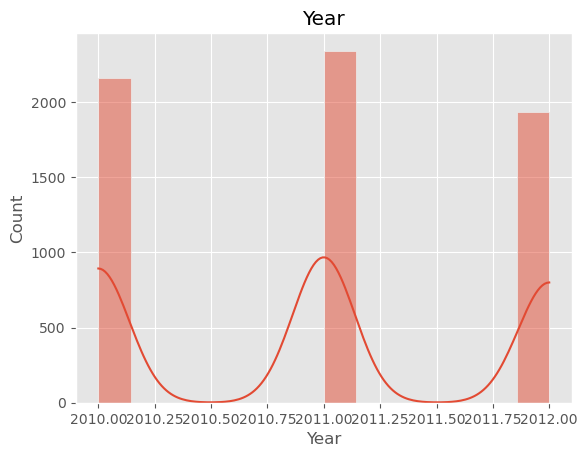

In [48]:
for col in df2.columns:
    sns.histplot(df2[col],kde=True)
    plt.title(col)
    plt.show()

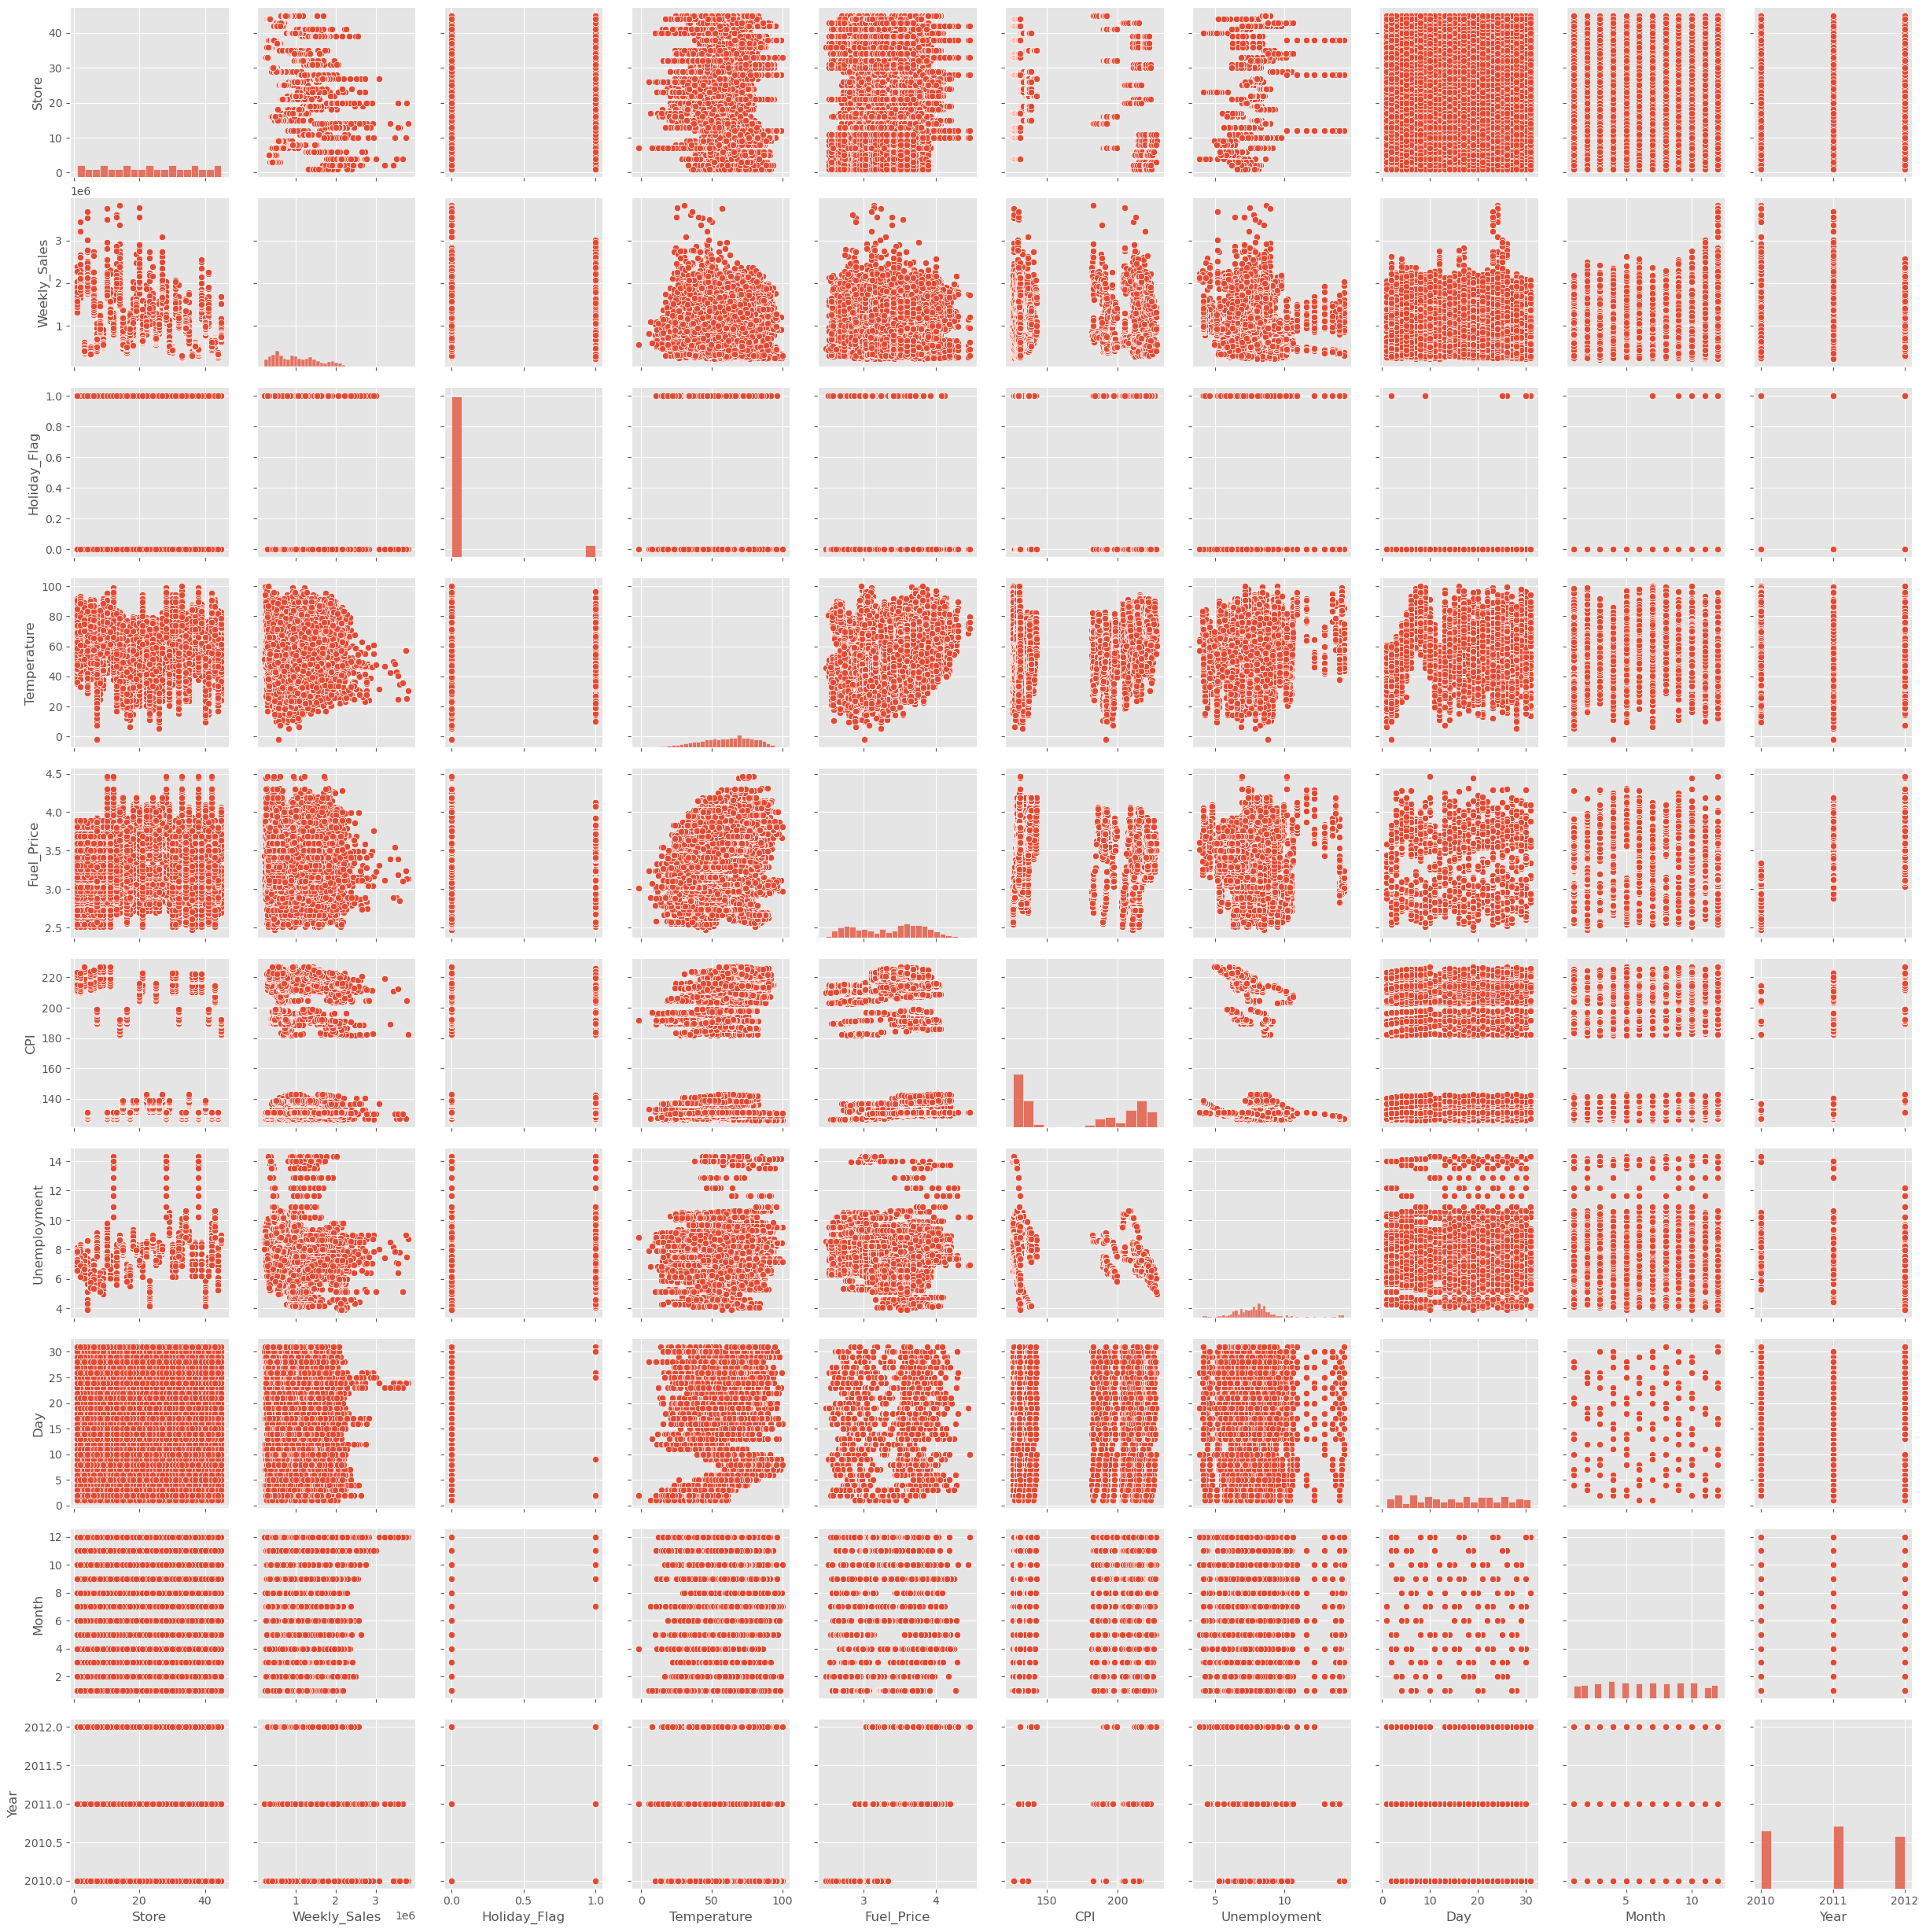

In [49]:
sns.pairplot(df2)
plt.show()

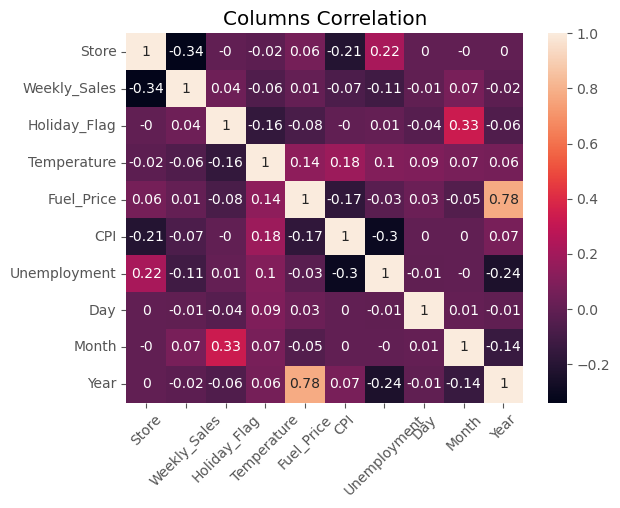

In [51]:
sns.heatmap(df2.corr().round(2),annot=True)
plt.xticks(rotation =45)
plt.title('Columns Correlation')
plt.show()

In [65]:
df2.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [71]:
df2[df2.Holiday_Flag != 0][['Weekly_Sales','CPI','Day','Month']].describe()

Weekly_Sales         CPI         Day       Month
count  4.500000e+02  450.000000  450.000000  450.000000
mean   1.122888e+06  171.268092   14.500000   10.500000
std    6.276849e+05   39.291449   11.477925    1.501669
min    2.153592e+05  126.114581    2.000000    7.000000
25%    5.758655e+05  131.586613    2.000000   10.000000
50%    1.018538e+06  182.598178    9.000000   11.000000
75%    1.555213e+06  211.760416   26.000000   12.000000
max    3.004702e+06  226.210354   31.000000   12.000000

In [76]:
df2[df2.Holiday_Flag != 0]['Month'].value_counts()

11    135
12    135
10     90
7      45
9      45
Name: Month, dtype: int64

In [70]:
df2[df2.Holiday_Flag == 0][['Weekly_Sales','CPI','Day','Month']].describe()

Weekly_Sales          CPI          Day        Month
count  5.985000e+03  5985.000000  5985.000000  5985.000000
mean   1.041256e+06   171.601725    15.736842     6.172932
std    5.589574e+05    39.364794     8.508907     3.222633
min    2.099862e+05   126.064000     1.000000     1.000000
25%    5.513784e+05   131.784000     8.000000     4.000000
50%    9.562112e+05   182.622509    16.000000     6.000000
75%    1.414344e+06   212.861131    23.000000     9.000000
max    3.818686e+06   227.232807    31.000000    12.000000

Based on analytics above, we can conclude :
- Sales has decreased over years. Most sales achieved was in 2010
- CPI has increased over years. Most CPI achieved in 2012. Which idicate CPI has strong correlation to Weekly Sales. Which is Fact that Higher CPI mean prices are falling
- Peak Sales are mostly before new year 
- Holidays Sales affect average and quartile selling (higher) rather than normal day. But Peak / most sales still achieved during normal day.
- Holidays often happen on day 2, 9, 25, 26, 30, 31. Mostly happen on day 2 and 9. Happen on month 7, 9, 11, and 12 with most on month 11 and 12
- Highest Sales achieved at Store 20 and least sales at store 33

In [245]:
monthly_sales = ts.resample('M')[['Weekly_Sales','Holiday_Flag','CPI','Fuel_Price','Temperature','Unemployment']].mean().reset_index()

# monthly_sales.Weekly_Sales = (monthly_sales.Weekly_Sales-monthly_sales.Weekly_Sales.min())/(monthly_sales.Weekly_Sales.max()-monthly_sales.Weekly_Sales.min())
# monthly_sales.Fuel_Price = (monthly_sales.Fuel_Price-monthly_sales.Fuel_Price.min())/(monthly_sales.Fuel_Price.max()-monthly_sales.Fuel_Price.min())
# monthly_sales.CPI = (monthly_sales.CPI-monthly_sales.CPI.min())/(monthly_sales.CPI.max()-monthly_sales.CPI.min())
# monthly_sales.Temperature = (monthly_sales.Temperature-monthly_sales.Temperature.min())/(monthly_sales.Temperature.max()-monthly_sales.Temperature.min())
# monthly_sales.Unemployment = (monthly_sales.Unemployment-monthly_sales.Unemployment.min())/(monthly_sales.Unemployment.max()-monthly_sales.Unemployment.min())

monthly_sales

Date  Weekly_Sales  Holiday_Flag         CPI  Fuel_Price  \
0  2010-01-31  9.386639e+05      0.000000  168.354706    2.734333   
1  2010-02-28  1.064372e+06      0.000000  167.888120    2.744211   
2  2010-03-31  1.034590e+06      0.000000  168.124016    2.818256   
3  2010-04-30  1.021177e+06      0.000000  167.700036    2.867767   
4  2010-05-31  1.039303e+06      0.000000  167.881788    2.838248   
5  2010-06-30  1.055082e+06      0.000000  168.075428    2.777237   
6  2010-07-31  1.023702e+06      0.000000  167.909082    2.806144   
7  2010-08-31  1.025212e+06      0.000000  168.272516    2.778411   
8  2010-09-30  9.983559e+05      0.000000  168.057328    2.777711   
9  2010-10-31  1.027201e+06      0.200000  168.430272    2.848187   
10 2010-11-30  1.176097e+06      0.333333  168.395335    2.872667   
11 2010-12-31  1.198413e+06      0.333333  168.312007    2.902726   
12 2011-01-31  9.420697e+05      0.000000  169.742571    3.328982   
13 2011-02-28  1.042273e+06      0.000000  171.282465    3.360111   
14 2011-03-31  1.011263e+06      0.000000  170.741833    3.663896   
15 2011-04-30  1.033220e+06      0.000000  170.978757    3.600711   
16 2011-05-31  1.015565e+06      0.000000  171.489324    3.908544   
17 2011-06-30  1.038471e+06      0.000000  171.280956    3.826415   
18 2011-07-31  9.976049e+05      0.000000  171.255562    3.550316   
19 2011-08-31  1.044895e+06      0.000000  171.571944    3.656600   
20 2011-09-30  1.026810e+06      0.200000  172.571884    3.588013   
21 2011-10-31  1.020663e+06      0.000000  172.519764    3.594056   
22 2011-11-30  1.126535e+06      0.400000  171.931971    3.422049   
23 2011-12-31  1.274311e+06      0.250000  173.368097    3.405083   
24 2012-01-31  9.567817e+05      0.000000  174.639395    3.481206   
25 2012-02-29  1.057997e+06      0.000000  174.790097    3.626341   
26 2012-03-31  1.025510e+06      0.000000  175.178397    3.729267   
27 2012-04-30  1.014127e+06      0.000000  175.542429    3.959933   
28 2012-05-31  1.053948e+06      0.000000  175.915883    3.822674   
29 2012-06-30  1.082920e+06      0.000000  175.333103    3.580581   
30 2012-07-31  1.025480e+06      0.250000  175.758759    3.600494   
31 2012-08-31  1.064514e+06      0.000000  175.773159    3.734650   
32 2012-09-30  9.988663e+05      0.000000  175.944637    3.841689   
33 2012-10-31  1.044885e+06      0.250000  175.885659    3.701300   
34 2012-11-30  1.042797e+06      0.000000  175.626366    3.869689   
35 2012-12-31  1.025078e+06      0.000000  176.636515    3.896733   

    Temperature  Unemployment  
0     69.868000      8.475289  
1     51.804389      8.541228  
2     54.115222      8.535622  
3     61.594056      8.497711  
4     54.495000      8.534507  
5     77.451037      8.474667  
6     76.204222      8.445861  
7     74.354333      8.440256  
8     69.911611      8.445861  
9     58.164489      8.465947  
10    56.856593      8.482763  
11    41.715889      8.523296  
12    45.954356      8.224244  
13    53.564333      8.121028  
14    59.319778      8.244178  
15    50.459111      8.139504  
16    69.581278      8.136972  
17    69.764815      8.150133  
18    68.332133      8.077578  
19    73.725056      8.110650  
20    64.832089      8.038836  
21    63.796444      7.890700  
22    46.038044      7.999013  
23    49.765889      7.877539  
24    48.775444      7.486133  
25    43.604593      7.508333  
26    58.910356      7.454133  
27    61.777111      7.419533  
28    68.468963      7.264259  
29    68.559815      7.403967  
30    78.899500      7.237333  
31    75.952500      7.282883  
32    63.617111      7.305083  
33    60.796167      7.163272  
34    64.838000      7.419533  
35    58.342667      6.953711

In [77]:
store_20 = ts[ts.Store == 20]
store_20.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10     20    1933719.21             0        61.08       2.707   
2010-02-04     20    2405395.22             0        51.00       2.850   
2010-02-07     20    2143676.77             0        70.10       2.815   
2010-02-19     20    2161549.76             0        25.43       2.745   
2010-02-26     20    1898193.95             0        32.32       2.754   

                   CPI  Unemployment  Day  Month  Year  
Date                                                    
2010-01-10  204.885097         7.484   10      1  2010  
2010-02-04  204.025284         7.856    4      2  2010  
2010-02-07  204.465056         7.527    7      2  2010  
2010-02-19  204.432100         8.187   19      2  2010  
2010-02-26  204.463087         8.187   26      2  2010

In [258]:
featured = ['Store','Weekly_Sales','Holiday_Flag','Temperature',
            'CPI','Fuel_Price','Unemployment',
            'Day','Month','Year'
            ]

data = store_20[featured] 
# data.set_index('Date',inplace=True)
data

Store  Weekly_Sales  Holiday_Flag  Temperature         CPI  \
Date                                                                     
2010-01-10     20    1933719.21             0        61.08  204.885097   
2010-02-04     20    2405395.22             0        51.00  204.025284   
2010-02-07     20    2143676.77             0        70.10  204.465056   
2010-02-19     20    2161549.76             0        25.43  204.432100   
2010-02-26     20    1898193.95             0        32.32  204.463087   
...           ...           ...           ...          ...         ...   
2012-10-08     20    2144245.39             0        75.40  214.748459   
2012-10-19     20    1999363.49             0        56.26  216.146470   
2012-10-26     20    2031650.55             0        60.04  216.151590   
2012-11-05     20    2168097.11             0        63.19  214.531910   
2012-12-10     20    2162951.36             0        47.20  216.115057   

            Fuel_Price  Unemployment  Day  Month  Year  
Date                                                    
2010-01-10       2.707         7.484   10      1  2010  
2010-02-04       2.850         7.856    4      2  2010  
2010-02-07       2.815         7.527    7      2  2010  
2010-02-19       2.745         8.187   19      2  2010  
2010-02-26       2.754         8.187   26      2  2010  
...                ...           ...  ...    ...   ...  
2012-10-08       3.722         7.280    8     10  2012  
2012-10-19       3.969         7.293   19     10  2012  
2012-10-26       3.882         7.293   26     10  2012  
2012-11-05       3.889         7.139    5     11  2012  
2012-12-10       4.000         7.293   10     12  2012  

[143 rows x 10 columns]

In [174]:
def result_report(y_test,y_pred,classifier):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual')
    plt.plot(data.index[-len(y_test):], y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{classifier} Regression Forecast')
    plt.legend()
    plt.show()

    #Calculating Mean Absolute Error
    MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
    print('Mean Absolute Error Value is : ', MAEValue)

    #Calculating Mean Squared Error
    MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
    print('Mean Squared Error Value is : ', MSEValue)

    #Calculating Median Absolute Error
    MdSEValue = median_absolute_error(y_test, y_pred)
    print('Median Absolute Error Value is : ', MdSEValue )

    return {
        'MAE':MAEValue,
        'MSE':MSEValue,
        'MdSE':MdSEValue
     } 
    

In [259]:
import json
import os
def write_report(test_size,regressor,metrics,params=None):

    # Data to be written to the JSON file
    data = {
        "Regressor": regressor,
        "Test Size": test_size,
        "Params": params,
        "Metrics": metrics,
    }

    # Specify the file path
    file_path = "Report.json"

    # Check if the file already exists
    if os.path.exists(file_path):
        # If the file exists, read the existing data first
        with open(file_path, "r") as json_file:
            existing_data = json.load(json_file)
        
        # Update the existing data with new data
        existing_data.append(data)  # Modify this according to your needs
        
        # Write the updated data back to the file
        with open(file_path, "w") as json_file:
            json.dump(existing_data, json_file, indent=4)
    else:
        # If the file doesn't exist, create a new file and write the data
        with open(file_path, "w") as json_file:
            json.dump([data], json_file, indent=4)


In [265]:
TEST_SIZE = 0.35

In [266]:
X = data.drop('Weekly_Sales',axis=1)
y = data['Weekly_Sales']

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=TEST_SIZE,shuffle=False)

In [267]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(2,20)}

# Create a random forest classifier
rf = RandomForestRegressor(random_state=32)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist,  
                                 n_iter=15,
                                 cv=5,
                                 scoring='neg_mean_squared_error')

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_params = rand_search.best_params_
best_score = rand_search.best_score_

# Print the best hyperparameters
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

Best Parameters: {'max_depth': 2, 'n_estimators': 411}
Best Mean Squared Error: -93342356111.60744


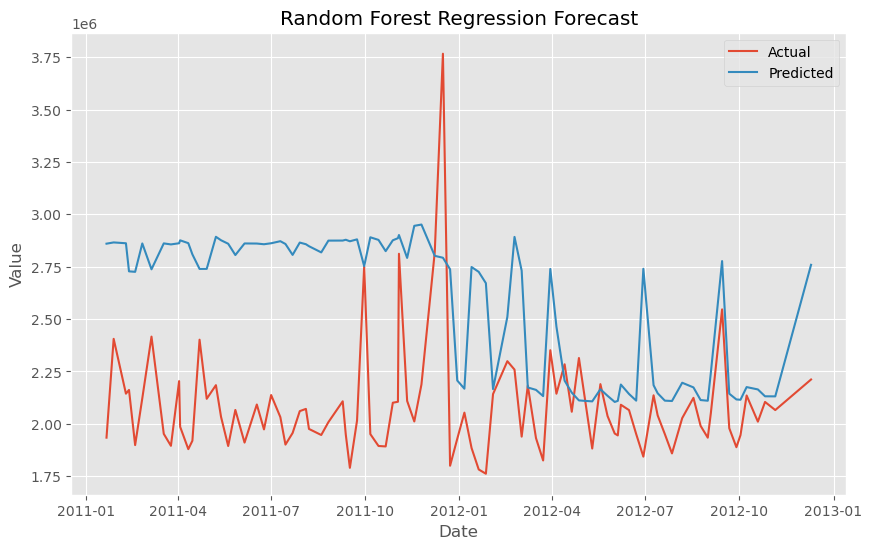

Mean Absolute Error Value is :  520528.15193730366
Mean Squared Error Value is :  398479788785.6176
Median Absolute Error Value is :  626916.1412312046


In [268]:
rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'], random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

result = result_report(y_test,y_pred,'Random Forest')
write_report(TEST_SIZE,'Random Forest',result,best_params)

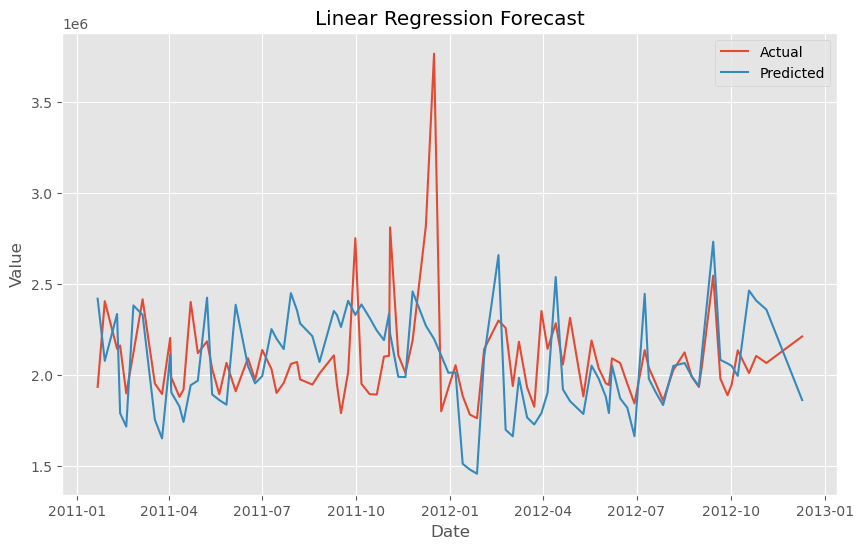

Mean Absolute Error Value is :  237089.2641251641
Mean Squared Error Value is :  98257737015.85759
Median Absolute Error Value is :  196230.95899401186


In [269]:
#Linear Regression

params = {'jobs':5}

linear_regressor = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=params['jobs'])
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

result = result_report(y_test,y_pred,'Linear')
write_report(TEST_SIZE,'Linear',result,params)